Note: this notebook is used as a playground for testing scripts, algos, results, EDA, etc. It will not ve refreshed by any shceduled job.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import bt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
import plotly.graph_objects as go
import yfinance as yf
import talib
import datetime
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
import chewie_pack

## Importing Dataset

In [3]:
df = pd.read_csv('ticker_data.csv', index_col='Date', parse_dates=True)
indicators = chewie_pack.indicators

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24720 entries, 2014-09-17 to 2022-02-17
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24720 non-null  float64
 1   High          24720 non-null  float64
 2   Low           24720 non-null  float64
 3   Close         24720 non-null  float64
 4   Volume        24720 non-null  int64  
 5   Dividends     24720 non-null  float64
 6   Stock Splits  24720 non-null  float64
 7   ticker        24720 non-null  object 
 8   nom_change    24710 non-null  float64
 9   pct_change    24710 non-null  float64
 10  SMA_10        24630 non-null  float64
 11  SMA_50        24230 non-null  float64
 12  EMA_10        24630 non-null  float64
 13  EMA_50        24230 non-null  float64
 14  ADX_10        23730 non-null  float64
 15  ADX_50        23730 non-null  float64
 16  RSI_10        24620 non-null  float64
 17  RSI_50        24220 non-null  float64
 18  BB_10_upp

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ticker', 'nom_change', 'pct_change', 'SMA_10', 'SMA_50', 'EMA_10',
       'EMA_50', 'ADX_10', 'ADX_50', 'RSI_10', 'RSI_50', 'BB_10_upper',
       'BB_10_middle', 'BB_10_lower', 'BB_50_upper', 'BB_50_middle',
       'BB_50_lower', 'sg_SMA_Cross', 'sg_EMA_Cross', 'sg_ADX_10', 'sg_ADX_50',
       'sg_RSI_10', 'sg_RSI_50', 'sg_BB_10', 'sg_BB_50'],
      dtype='object')

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,nom_change,pct_change,SMA_10,...,ADX_10,ADX_50,RSI_10,RSI_50,BB_10_upper,BB_10_middle,BB_10_lower,BB_50_upper,BB_50_middle,BB_50_lower
count,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000,24710.000000,24710.000000,24630.000000,...,23730.000000,23730.000000,24620.000000,24220.000000,24630.000000,24630.000000,24630.000000,24230.000000,24230.000000,24230.000000
mean,1746.039296,1784.689719,1703.418754,1747.664090,3.015736e+09,0.001658,0.000769,2.027857,0.181728,1743.735993,...,14.310084,14.310096,54.228149,53.557645,1877.283972,1743.736002,1610.188032,2057.615469,1727.097184,1396.578899
std,6360.782237,6530.734694,6167.100808,6364.183530,8.880432e+09,0.026249,0.061993,257.253256,3.521275,6342.930577,...,6.167632,6.167650,14.914674,7.175989,6919.048071,6342.930584,5781.362119,7662.920554,6252.754665,4915.328480
min,0.023954,0.025993,0.019130,0.023961,7.922000e+03,0.000000,0.000000,-7554.040000,-42.350000,0.030000,...,3.640650,3.640000,7.230000,29.340000,0.028709,0.026482,-0.062973,0.040473,0.032968,-21.469339
25%,38.189302,38.840501,37.679999,38.292318,5.696963e+06,0.000000,0.000000,-1.100000,-0.910000,38.542500,...,9.489219,9.490000,43.670000,48.550000,40.613085,38.542649,36.294438,43.328577,39.387944,34.566969
50%,162.489011,164.407458,160.348677,162.349983,5.552249e+07,0.000000,0.000000,0.010000,0.090000,162.085000,...,13.131048,13.130000,54.220000,53.350000,170.754558,162.086329,154.495851,186.253659,161.419490,140.449148
75%,1082.282471,1099.104980,1067.942505,1083.789978,2.446180e+09,0.000000,0.000000,1.847500,1.160000,1084.680000,...,17.545420,17.547500,65.020000,58.160000,1135.301979,1084.679990,1027.957705,1199.281507,1087.468449,982.080394
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.750000,7.000000,7293.020000,136.680000,64698.850000,...,42.958320,42.960000,97.310000,84.980000,69025.163291,64698.849609,61368.912953,72219.851101,60801.771016,54468.973445


## Testing strategies

In [6]:
#df_test = df[df.index.year>=2020]
#df_test = df_test[df_test.ticker=='MSFT']
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]

<AxesSubplot:title={'center':'Backtest result'}>

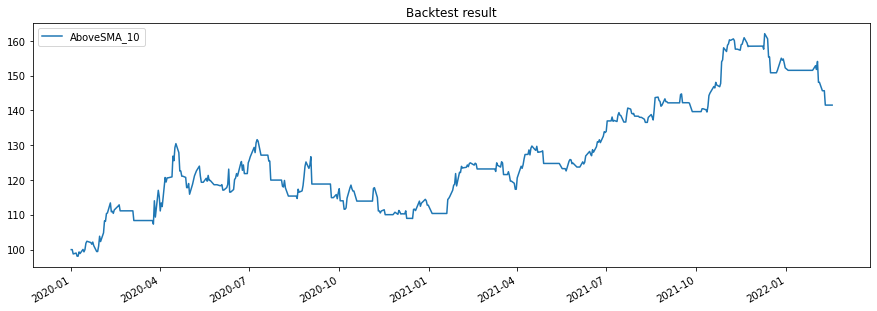

In [7]:
#df_test = df[df.ticker=='MSFT']['Close'].to_frame()
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')
ref = df_test.SMA_10.to_frame(name='Close')

# Define the signal-based strategy
bt_strategy = bt.Strategy('AboveSMA_10',
                        [bt.algos.SelectWhere( price > ref ),
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

# !!!!Reminder to correct all the sg_MA_x

<AxesSubplot:title={'center':'Backtest result'}>

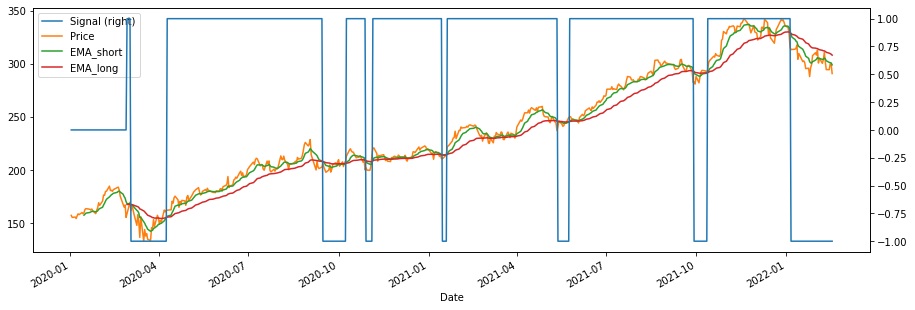

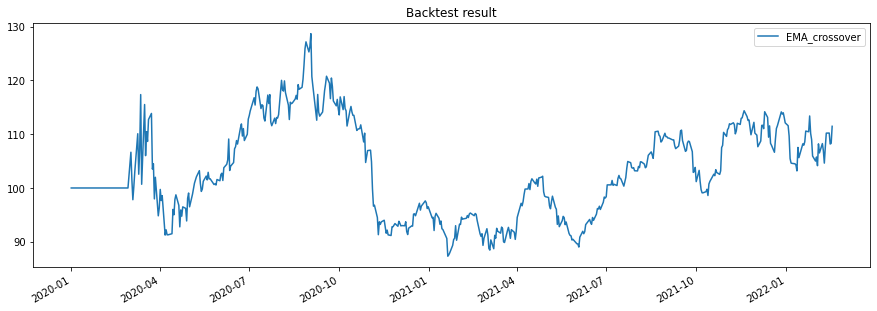

In [8]:
#### MA crossover strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')

# Calculate the indicators
EMA_short = talib.EMA(df_test['Close'], timeperiod=10).to_frame(name='Close')
EMA_long = talib.EMA(df_test['Close'], timeperiod=40).to_frame(name='Close')

# Create the signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

# Plot the signal, price and MAs
combined_df = bt.merge(signal, price, EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

In [9]:
signal.reset_index().Close.value_counts()

 1.0    399
-1.0    100
 0.0     39
Name: Close, dtype: int64

In [10]:
df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).value_counts()

 0    503
-1     34
 1      1
Name: sg_RSI_10, dtype: int64

In [11]:
df_test.sg_RSI_10.value_counts()

hold    503
sell     34
buy       1
Name: sg_RSI_10, dtype: int64

<AxesSubplot:title={'center':'Backtest result'}>

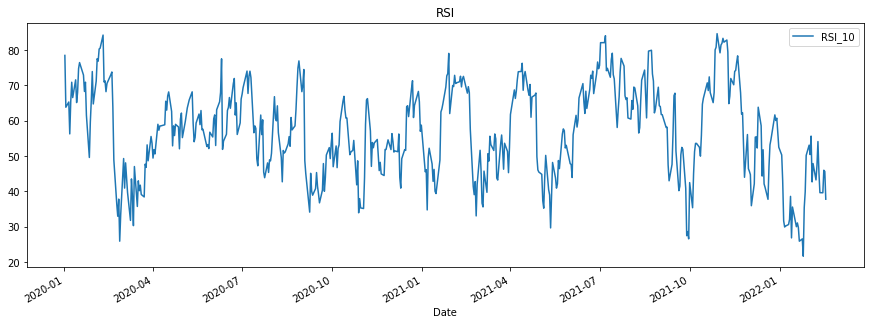

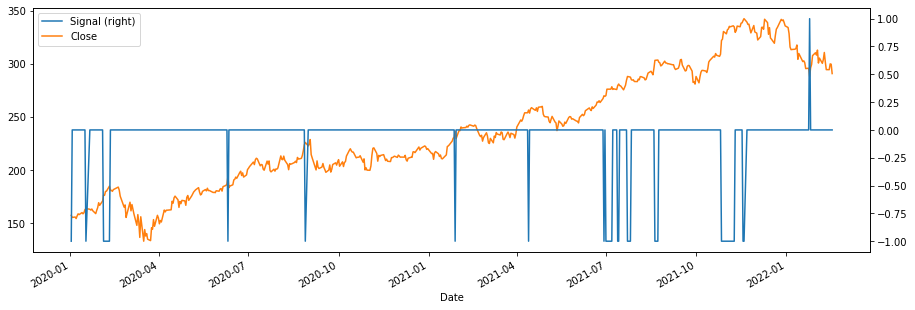

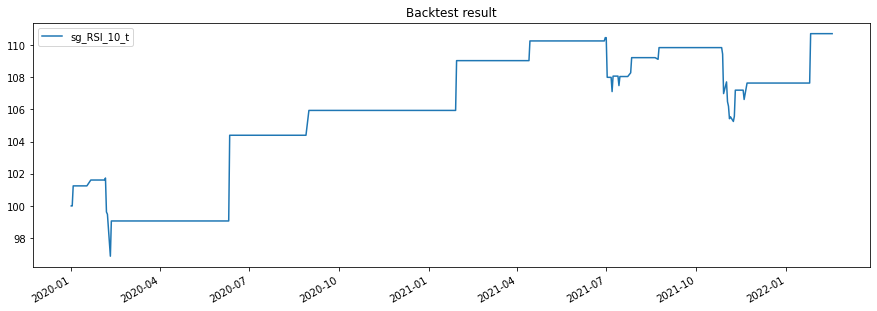

In [12]:
#### RSI-based Mean Reversion Strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
close = df_test.Close.to_frame(name='Close')
sg_RSI_10_t = df_test.sg_RSI_10.to_frame(name='Close')

# Construct the signal
signal = df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')

df_test.RSI_10.to_frame().plot()
plt.title('RSI')

# Plot the signal, price and MAs
combined_df = bt.merge(signal, close, sg_RSI_10_t)
combined_df.columns = ['Signal', 'Close', 'sg_RSI_10_t']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('sg_RSI_10_t', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, close)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')


In [13]:
#### Benchmarking example
def buy_and_hold(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    # Get the data
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.RunOnce(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, close)

In [14]:
#### Strategy Optimization example
def signal_rever(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')    
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
                 [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()]) 
    return bt.Backtest(bt_strategy, close)

In [15]:
# Strategy Optimization example
def signal_trend(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.SelectWhere(signal),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, close)

In [16]:
chewie_pack.indicators

['sg_SMA_Cross',
 'sg_EMA_Cross',
 'sg_ADX_10',
 'sg_ADX_50',
 'sg_RSI_10',
 'sg_RSI_50',
 'sg_BB_10',
 'sg_BB_50']

In [17]:
ticker='MSFT'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, signal_name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategies for {}'.format(ticker))

KeyError: 'sg_AboveSMA_10'

<AxesSubplot:title={'center':'Strategies for BTC-USD'}>

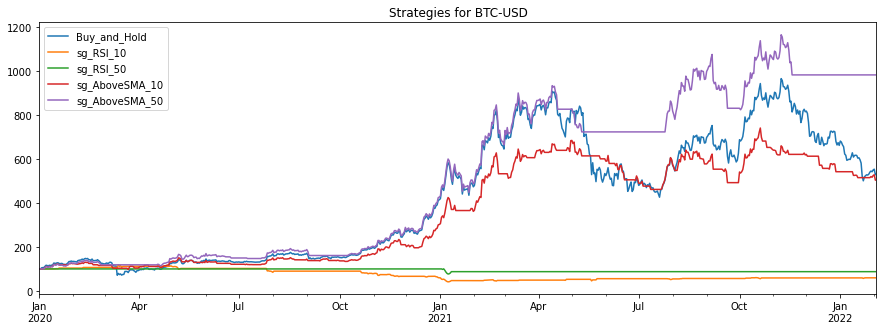

In [ ]:
ticker='BTC-USD'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, signal_name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategies for {}'.format(ticker))

In [ ]:
test = {'a':1,'b':2}
test['b']

2

In [ ]:
for i in bt_results.keys():
    print(i)

Buy_and_Hold
sg_RSI_10
sg_RSI_50
sg_AboveSMA_10
sg_AboveSMA_50


In [ ]:
bt_results.prices

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
2020-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,105.139621,100.000000,100.000000,100.000000,100.000000
2020-01-04,106.080167,100.000000,100.000000,100.894505,100.000000
2020-01-05,106.089615,100.000000,100.000000,100.903490,100.008853
...,...,...,...,...,...
2022-01-30,542.329478,59.525525,87.607971,517.317227,983.148438
2022-01-31,550.416463,59.525525,87.607971,525.008345,983.148438
2022-02-01,554.136586,59.525525,87.607971,528.546364,983.148438
2022-02-02,528.535452,59.525525,87.607971,504.198433,983.148438


In [ ]:
bt_results['Buy_and_Hold'].prices

2020-01-01    100.000000
2020-01-02    100.000000
2020-01-03    105.139621
2020-01-04    106.080167
2020-01-05    106.089615
                 ...    
2022-01-30    542.329478
2022-01-31    550.416463
2022-02-01    554.136586
2022-02-02    528.535452
2022-02-03    531.418578
Name: Buy_and_Hold, Length: 765, dtype: float64

In [ ]:
#http://pmorissette.github.io/ffn/ffn.html#ffn.core.GroupStats
bt_results.to_csv()


'Stat,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50\nStart,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01\nEnd,2022-02-03,2022-02-03,2022-02-03,2022-02-03,2022-02-03\nRisk-free rate,0.00%,0.00%,0.00%,0.00%,0.00%\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nTotal Return,431.42%,-40.47%,-12.39%,404.20%,883.15%\nDaily Sharpe,1.20,-0.52,-0.42,1.47,1.92\nDaily Sortino,1.94,-0.69,-0.51,2.64,3.44\nCAGR,122.24%,-21.96%,-6.13%,116.72%,198.23%\nMax Drawdown,-53.06%,-65.43%,-23.42%,-32.55%,-25.38%\nCalmar Ratio,2.30,-0.34,-0.26,3.59,7.81\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nMTD,-3.45%,0.00%,0.00%,-3.96%,0.00%\n3m,-40.99%,0.95%,0.00%,-20.95%,-9.54%\n6m,-2.62%,9.09%,0.00%,-8.04%,25.90%\nYTD,-19.76%,0.95%,0.00%,-7.06%,0.00%\n1Y,-0.85%,26.70%,0.00%,23.13%,78.28%\n3Y (ann.),122.24%,-21.96%,-6.13%,116.72%,198.23%\n5Y (ann.),-,-,-,-,-\n10Y (ann.),-,-,-,-,-\nSince Incep. (ann.),122.24%,-21.96%,-6.13%,116.72%,198.23%\n,,,,,,,

In [ ]:
bt_results.stats

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
start,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
end,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00
rf,0.0,0.0,0.0,0.0,0.0
total_return,4.314186,-0.404745,-0.12392,4.041984,8.831484
cagr,1.222357,-0.219647,-0.06129,1.167189,1.982272
max_drawdown,-0.530556,-0.654282,-0.234244,-0.325499,-0.253799
calmar,2.303919,-0.335707,-0.26165,3.585851,7.810413
mtd,-0.034515,0.0,0.0,-0.039637,0.0
three_month,-0.409915,0.009526,0.0,-0.209506,-0.095397
six_month,-0.026163,0.090916,0.0,-0.080446,0.259021


In [ ]:
bt_results.stats.index

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')

In [ ]:
stats_to_display = ['total_return', 'cagr', 'max_drawdown', 'calmar',
       'daily_sharpe', 'daily_sortino', 'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 
       'best_day', 'worst_day', 
       'monthly_sharpe', 'monthly_sortino', 'monthly_mean', 'monthly_vol', 'monthly_skew', 'monthly_kurt', 
       'best_month', 'worst_month', 
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month']
bt_results.stats.loc[stats_to_display].shape#.to_dict('records')

(24, 5)

In [ ]:
d_columns_stats = [{'id':x, 'name':x} for x in chewie_pack.indicators]
d_columns_stats

[{'id': 'sg_SMA_Cross', 'name': 'sg_SMA_Cross'},
 {'id': 'sg_EMA_Cross', 'name': 'sg_EMA_Cross'},
 {'id': 'sg_ADX_10', 'name': 'sg_ADX_10'},
 {'id': 'sg_ADX_50', 'name': 'sg_ADX_50'},
 {'id': 'sg_RSI_10', 'name': 'sg_RSI_10'},
 {'id': 'sg_RSI_50', 'name': 'sg_RSI_50'},
 {'id': 'sg_BB_10', 'name': 'sg_BB_10'},
 {'id': 'sg_BB_50', 'name': 'sg_BB_50'}]

In [ ]:
to_define_better = 'Buy_and_Hold','sg_RSI_10','sg_RSI_50','sg_AboveSMA_10','sg_AboveSMA_50'
d_columns_stats = [{'id':x, 'name':x} for x in to_define_better]
#df_stats = pd.DataFrame()
#df_stats
pd.DataFrame(columns=to_define_better, index=stats_to_display)#.to_dict('records')

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
total_return,NaN,NaN,NaN,NaN,NaN
cagr,NaN,NaN,NaN,NaN,NaN
max_drawdown,NaN,NaN,NaN,NaN,NaN
calmar,NaN,NaN,NaN,NaN,NaN
daily_sharpe,NaN,NaN,NaN,NaN,NaN
daily_sortino,NaN,NaN,NaN,NaN,NaN
daily_mean,NaN,NaN,NaN,NaN,NaN
daily_vol,NaN,NaN,NaN,NaN,NaN
daily_skew,NaN,NaN,NaN,NaN,NaN
daily_kurt,NaN,NaN,NaN,NaN,NaN


In [ ]:
bt_results.stats.loc[stats_to_display].reset_index().to_dict('records')

[{'index': 'total_return',
  'Buy_and_Hold': 4.314185782714836,
  'sg_RSI_10': -0.4047447548828129,
  'sg_RSI_50': -0.12392028906250019,
  'sg_AboveSMA_10': 4.041984329101559,
  'sg_AboveSMA_50': 8.831484379394547},
 {'index': 'cagr',
  'Buy_and_Hold': 1.2223570281114648,
  'sg_RSI_10': -0.21964711433859196,
  'sg_RSI_50': -0.061289901944596936,
  'sg_AboveSMA_10': 1.1671893199712722,
  'sg_AboveSMA_50': 1.982272216867789},
 {'index': 'max_drawdown',
  'Buy_and_Hold': -0.5305555361976673,
  'sg_RSI_10': -0.6542815808612485,
  'sg_RSI_50': -0.23424387447252937,
  'sg_AboveSMA_10': -0.32549858292750067,
  'sg_AboveSMA_50': -0.25379864888611114},
 {'index': 'calmar',
  'Buy_and_Hold': 2.303919089925499,
  'sg_RSI_10': -0.33570731740524395,
  'sg_RSI_50': -0.26164996665381157,
  'sg_AboveSMA_10': 3.5858506954890306,
  'sg_AboveSMA_50': 7.810412803881032},
 {'index': 'daily_sharpe',
  'Buy_and_Hold': 1.203512459839632,
  'sg_RSI_10': -0.5216858841975597,
  'sg_RSI_50': -0.415894910794721,
 

In [ ]:
df_test2 = bt_results.stats.loc[stats_to_display]
df_test2.astype(float).round(2)#.info()

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
total_return,4.31,-0.40,-0.12,4.04,8.83
cagr,1.22,-0.22,-0.06,1.17,1.98
max_drawdown,-0.53,-0.65,-0.23,-0.33,-0.25
calmar,2.30,-0.34,-0.26,3.59,7.81
daily_sharpe,1.20,-0.52,-0.42,1.47,1.92
daily_sortino,1.94,-0.69,-0.51,2.64,3.44
daily_mean,0.75,-0.14,-0.04,0.62,0.85
daily_vol,0.63,0.26,0.09,0.42,0.44
daily_skew,-0.86,-0.97,-4.64,0.83,0.59
daily_kurt,12.05,25.45,139.14,6.26,5.78


In [ ]:
strategies = ['Buy_and_Hold','sg_SMA_Cross','sg_EMA_Cross','sg_RSI_10','sg_RSI_50','sg_BB_10','sg_BB_50']
d_columns_stats = ['Stat']+strategies
d_columns_stats = [{'id':x, 'name':x} for x in d_columns_stats]
d_columns_stats


[{'id': 'Stat', 'name': 'Stat'},
 {'id': 'Buy_and_Hold', 'name': 'Buy_and_Hold'},
 {'id': 'sg_SMA_Cross', 'name': 'sg_SMA_Cross'},
 {'id': 'sg_EMA_Cross', 'name': 'sg_EMA_Cross'},
 {'id': 'sg_RSI_10', 'name': 'sg_RSI_10'},
 {'id': 'sg_RSI_50', 'name': 'sg_RSI_50'},
 {'id': 'sg_BB_10', 'name': 'sg_BB_10'},
 {'id': 'sg_BB_50', 'name': 'sg_BB_50'}]

## Getting data more dense than daily
https://medium.com/@jsteinb/python-adding-features-to-your-stock-market-dashboard-with-plotly-4208d8bc3bd5 \
https://medium.com/@jsteinb/python-build-a-program-to-retrieve-and-graph-live-stock-market-data-311d9ca1b7d3 \
https://tradologics.com/ \

In [24]:
import yfinance as yf

In [28]:
yf.download(tickers='BTC-USD', period='1y', interval='1m')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 1m data not available for startTime=1613725560 and endTime=1645261560. Only 7 days worth of 1m granularity data are allowed to be fetched per request.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [29]:
yf.download(tickers='BTC-USD', period='2y', interval='5m')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 5m data not available for startTime=1582189565 and endTime=1645261565. The requested range must be within the last 60 days.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [39]:
yf.download(tickers='BTC-USD', period='2y', interval='1h')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-02-19 09:00:00+00:00,10129.571289,10134.795898,10112.287109,10118.188477,10118.188477,0
2020-02-19 10:00:00+00:00,10118.778320,10128.080078,10102.345703,10121.063477,10121.063477,17227776
2020-02-19 11:00:00+00:00,10108.551758,10160.802734,10108.551758,10160.802734,10160.802734,0
2020-02-19 12:00:00+00:00,10162.750977,10179.924805,10132.086914,10133.918945,10133.918945,333426688
2020-02-19 13:00:00+00:00,10132.254883,10143.647461,10123.360352,10124.887695,10124.887695,0
...,...,...,...,...,...,...
2022-02-19 06:00:00+00:00,40252.363281,40418.878906,40245.261719,40407.539062,40407.539062,201828352
2022-02-19 07:00:00+00:00,40402.906250,40402.906250,40297.527344,40297.527344,40297.527344,63981568
2022-02-19 08:00:00+00:00,40291.199219,40306.546875,40069.574219,40074.507812,40074.507812,80965632
2022-02-19 09:00:00+00:00,40071.160156,40071.160156,40010.320312,40018.312500,40018.312500,165888


In [4]:
yf.download(tickers='TSLA', period='1d', interval='5m')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-11 09:30:00-04:00,984.000000,989.552002,978.700012,989.099976,989.099976,2438024
2022-04-11 09:35:00-04:00,989.119995,996.909973,987.739990,992.610107,992.610107,857941
2022-04-11 09:40:00-04:00,993.000000,999.239929,988.000000,998.849976,998.849976,740864
2022-04-11 09:45:00-04:00,999.239929,999.250000,994.210022,996.655029,996.655029,481834
2022-04-11 09:50:00-04:00,996.590027,1000.570496,991.719971,993.166687,993.166687,505822
...,...,...,...,...,...,...
2022-04-11 15:40:00-04:00,979.440002,980.000000,977.530090,977.960022,977.960022,233349
2022-04-11 15:45:00-04:00,978.030029,978.049988,976.229980,976.315674,976.315674,289360
2022-04-11 15:50:00-04:00,976.229980,977.559875,976.049988,976.380005,976.380005,372113


In [47]:
np.where(df['pct_change']<0, 'red', 'green')

array(['green', 'red', 'red', ..., 'green', 'red', 'red'], dtype='<U5')

In [44]:
df['pct_change'] 

Date
2014-09-17     NaN
2014-09-18   -7.19
2014-09-19   -6.98
2014-09-20    3.57
2014-09-21   -2.47
              ... 
2022-02-11   -2.02
2022-02-14    0.14
2022-02-15    2.32
2022-02-16   -0.14
2022-02-17   -2.13
Name: pct_change, Length: 24720, dtype: float64

### IDEAS:
* Incorporate DOWNLOAD button CSV/EXCEL
* Scikit-Learn, explore
* Clustering of Stocks
* Create a new view comparing stocks side by side instead of one at the time
* Compare strategies over weeks
* Add agregation levels in the candle stick plot
* Parametrizar quantity of days 10, 50, 100 with user inputs
* Explore Kaggle G-Research
* Explore DC Finance
* Explore Arima, LSTM
* Caching dependencies: https://docs.github.com/en/actions/using-workflows/caching-dependencies-to-speed-up-workflows
* Selling data: https://eodhistoricaldata.com/?utm_source=EHD&utm_medium=refferal&utm_campaign=share10_for_friends
* https://www.cryptodatadownload.com/data/binance/
* https://www.cryptohopper.com/

### CB Strategies

In [11]:
df = pd.read_csv('ticker_data.csv', index_col='Date', parse_dates=True)
df = df[df.ticker=='BTC-USD']
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,nom_change,pct_change,...,BB_50_middle,BB_50_lower,sg_SMA_Cross,sg_EMA_Cross,sg_ADX_10,sg_ADX_50,sg_RSI_10,sg_RSI_50,sg_BB_10,sg_BB_50
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,47062.148438,47512.027344,45390.539062,45538.675781,33327427106,0.0,0.0,BTC-USD,-1523.99,-3.24,...,41436.555547,35875.951827,buy,buy,no_trend,no_trend,hold,hold,hold,hold
2022-04-01,45576.875000,45678.628906,44432.628906,45136.546875,41063772160,0.0,0.0,BTC-USD,-402.13,-0.88,...,41467.984219,35842.231210,buy,buy,no_trend,no_trend,hold,hold,hold,hold


### Charlie 2022-03-07
Binance
BTC-USD
5 min Candle

When RSI_50 < 30
    When Close < EMA_100
        => BUY
        When Delta => +1% => SELL
        When Delta <= -5% => SELL
    When Close > EMA_100
        => BUY
        When RSI_50 >= 70 => SELL


Delta = Close at Buy / Close Now

Results:
Win/Loss % and acum
Which trade
Qty of periods each

Check flow

### Charlie 2022-04-01
Binance
BTC-USD
5 min Candle

When RSI_14 < 25
    When RSI([last_op_bought; last_op_sold])>=30 AL MENOS 1 DATAPOINT CON RSI_14 MAYOR IGUAL A 30 EN EL RANGO DEL ULTIMO TRADE
        => BUY
        When Delta >= +1% => SELL
        When Delta <= -5% => SELL


Delta = Close at Buy / Close Now

Results:
Win/Loss % and acum
Which trade
Qty of periods each

Check flow

In [66]:
def rsi(df, close_name, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df[close_name].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods).mean()
        ma_down = down.rolling(window = periods).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [138]:
df.Close[-1]

46114.0859375

In [145]:
(115/100)-1

0.1499999999999999

In [164]:
df.index[-1]

Timestamp('2022-04-04 05:11:00+0000', tz='UTC')

In [202]:
tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]['price_in'][0]

46228.4453125

In [205]:
tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]['price_in'][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [241]:
tds = pd.read_csv('tds.csv') 
ticker = 'BTC-USD'
df = yf.download(tickers=ticker, period='1d', interval='5m')
rsi_14 = rsi(df, 'Close', periods=14)

strategy='cb1'
thresh_rsi=25
thresh_tp=0.009
thresh_sl=-0.0049
qty_in=100

if rsi_14[-1]>thresh_rsi:
    price_in=df.Close[-1]
    if len(tds[(tds.ticker==ticker) & (tds.strategy==strategy)] & (tds.pl.isnull()))==0: #BUY
        new_row=[ticker,strategy,df.index[-1],price_in,qty_in,rsi_14[-1],0,np.nan,np.nan,np.nan,np.nan,np.nan]
        tds.loc[len(tds)] = new_row
        #print('new_row:\t',new_row)
    else: #Already IN an Open Position
        old_price_in = tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]['price_in'][0]
        delta = (price_in / old_price_in) - 1
        cond2 = tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]['cond2'][0]
        if rsi_14[-1]>=30: #UPDATE cond2
            cond2 += 1
            tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'cond2'] = cond2
            print('cond2:\t',cond2)
        print('cond2:\t',cond2)
        print('delta:\t',delta)
        if (cond2>0) & ((delta<thresh_tp) | (delta<thresh_sl)): # SELL at TP/SL
            tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'tmstp_out'] = df.index[-1]
            tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'price_out'] = df.Close[-1]
            tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'qty_out'] = 1
            tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'rsi_out'] = rsi_14[-1]
            tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'pl'] = (df.Close[-1] / price_in)*qty_in
tds
tds.to_csv('tds.csv', index=False)


[*********************100%***********************]  1 of 1 completed


In [251]:
df = yf.download(tickers=ticker, period='60d', interval='5m')
df.to_csv('BTC-USD_5m_60d_20220404')

[*********************100%***********************]  1 of 1 completed


In [461]:
df = yf.download(tickers='LUNA1-USD', period='60d', interval='5m')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-06 00:00:00+00:00,55.397457,55.511642,55.397457,55.511642,55.511642,0
2022-02-06 00:05:00+00:00,55.519966,55.621159,55.519966,55.588608,55.588608,0
2022-02-06 00:10:00+00:00,55.617832,55.676937,55.617832,55.676937,55.676937,0
2022-02-06 00:15:00+00:00,55.679008,55.764576,55.679008,55.764576,55.764576,0
2022-02-06 00:20:00+00:00,55.722599,55.722599,55.581608,55.601967,55.601967,0
...,...,...,...,...,...,...
2022-04-06 05:35:00+00:00,117.220886,117.220886,117.155792,117.167397,117.167397,2552320
2022-04-06 05:40:00+00:00,117.157669,117.158173,117.109856,117.109856,117.109856,1361664
2022-04-06 05:45:00+00:00,117.087990,117.087990,117.001953,117.067444,117.067444,974592


In [9]:
df = yf.download(tickers='MELI', period='60d', interval='5m')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-14 09:30:00-05:00,1103.510010,1130.270020,1101.936401,1129.500000,1129.500000,30393
2022-01-14 09:35:00-05:00,1128.969971,1143.362549,1128.969971,1134.000000,1134.000000,10391
2022-01-14 09:40:00-05:00,1135.000000,1141.557251,1131.710083,1136.810059,1136.810059,4614
2022-01-14 09:45:00-05:00,1133.130005,1138.000000,1129.489990,1130.109985,1130.109985,6836
2022-01-14 09:50:00-05:00,1125.349976,1128.020020,1120.349976,1126.689941,1126.689941,6957
...,...,...,...,...,...,...
2022-04-11 15:40:00-04:00,1132.905029,1133.489990,1129.010010,1129.010010,1129.010010,7850
2022-04-11 15:45:00-04:00,1130.189941,1131.484253,1128.540039,1128.540039,1128.540039,8795
2022-04-11 15:50:00-04:00,1129.900024,1130.510010,1127.619995,1129.109985,1129.109985,8175


# Get historical 5m candles

In [3]:
#tickers = ['BTC-USD','ETH-USD','ADA-USD','SOL-USD','LUNA1-USD','DOT-USD','AVAX-USD']
tickers = ['BTC-USD','ETH-USD','ADA-USD','SOL-USD','LUNA1-USD','DOT-USD','AVAX-USD','AAPL','TSLA','AMZN','AMD','TWTR','MELI','NKE','COIN']
for i,ticker in enumerate(tickers):
    print(i,ticker)
    df = yf.download(tickers=ticker, period='60d', interval='5m')
    df.to_csv('drafts/20220505_5m_60d_{}.csv'.format(ticker))

0 BTC-USD
[*********************100%***********************]  1 of 1 completed
1 ETH-USD
[*********************100%***********************]  1 of 1 completed
2 ADA-USD
[*********************100%***********************]  1 of 1 completed
3 SOL-USD
[*********************100%***********************]  1 of 1 completed
4 LUNA1-USD
[*********************100%***********************]  1 of 1 completed
5 DOT-USD
[*********************100%***********************]  1 of 1 completed
6 AVAX-USD
[*********************100%***********************]  1 of 1 completed
7 AAPL
[*********************100%***********************]  1 of 1 completed
8 TSLA
[*********************100%***********************]  1 of 1 completed
9 AMZN
[*********************100%***********************]  1 of 1 completed
10 AMD
[*********************100%***********************]  1 of 1 completed
11 TWTR
[*********************100%***********************]  1 of 1 completed
12 MELI
[*********************100%***********************]  1 o

In [262]:
(rsi(df,'Close', periods=14)<20).sum()

335

In [424]:
pd.Timestamp(2022,2,10)

Timestamp('2022-02-10 00:00:00')

In [432]:
testing_df.index[0][:4]#>pd.Timestamp(2022,2,10)

'2022'

In [437]:
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2']#.values[-1]

0       1
1       1
2     132
3     352
4       3
5     280
6       2
7      38
8     164
9       2
10      2
11      2
12      2
13    256
14      2
15     31
16      2
17      1
18      2
19    121
20      2
21      2
22      2
23     67
24      8
25     42
26    213
27    136
28    170
29    237
30     78
31      0
Name: cond2, dtype: int64

In [439]:
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2'].index#[-1]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [440]:
cond2 = tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2'].values[-1]
print(cond2)
cond2_id = tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2'].index[-1]
print('UPDATE cond2!!!!!: ',cond2_id)
cond2 += 1
print(cond2)
#tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()) , 'cond2'] = cond2
tds.iloc[cond2_id, 6] = cond2


0
UPDATE cond2!!!!!:  31
1


In [442]:
tds.tail()

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
27,BTC-USD,cb1,2022-02-11 18:40:00+00:00,43034.773438,100,20.944019,136,2022-02-11 18:45:00+00:00,42804.746094,1.0,16.023239,-0.534515
28,BTC-USD,cb1,2022-02-12 06:40:00+00:00,42008.492188,100,16.819649,170,2022-02-12 06:45:00+00:00,41892.203125,1.0,12.994911,-0.276823
29,BTC-USD,cb1,2022-02-12 21:25:00+00:00,42484.554688,100,24.845619,237,2022-02-12 21:30:00+00:00,42431.988281,1.0,21.620635,-0.123731
30,BTC-USD,cb1,2022-02-13 18:40:00+00:00,42029.410156,100,24.354171,78,2022-02-13 18:45:00+00:00,42028.769531,1.0,24.324297,-0.001524
31,BTC-USD,cb1,2022-02-14 01:30:00+00:00,41690.207031,100,22.820012,1,2022-02-14 01:35:00+00:00,41772.894531,1.0,30.505683,0.198338


In [443]:
testing_df=pd.read_csv('BTC-USD_5m_60d_20220404',index_col='Datetime')
testing_df['rsi_14'] = rsi(testing_df,'Close',14)
testing_df.loc[(testing_df.rsi_14<25)]

,Open,High,Low,Close,Adj Close,Volume,rsi_14
Datetime,,,,,,,
2022-02-04 01:35:00+00:00,37162.410156,37162.410156,37127.921875,37127.921875,37127.921875,8292352,23.732956
2022-02-04 01:40:00+00:00,37097.949219,37097.949219,37094.250000,37097.375000,37097.375000,6854656,19.100937
2022-02-04 01:45:00+00:00,37104.574219,37107.570312,37093.628906,37093.628906,37093.628906,1290240,18.620964
2022-02-04 13:55:00+00:00,37556.097656,37556.097656,37478.675781,37478.675781,37478.675781,37371904,22.545848
2022-02-04 14:00:00+00:00,37466.136719,37466.136719,37400.179688,37400.179688,37400.179688,0,20.048854
...,...,...,...,...,...,...,...
2022-04-03 00:00:00+00:00,45876.777344,45876.777344,45860.222656,45860.222656,45860.222656,0,21.454424
2022-04-03 01:30:00+00:00,45676.171875,45676.171875,45674.335938,45674.335938,45674.335938,0,24.524634
2022-04-03 01:35:00+00:00,45634.105469,45658.710938,45634.105469,45643.847656,45643.847656,0,23.212651


In [403]:
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2'].values[-1]

0

In [282]:
testing_df=pd.read_csv('BTC-USD_5m_60d_20220404',index_col='Datetime')
len(testing_df)
for row in range(25,len(testing_df)):
    print(row)
    #print(testing_df.iloc[row])

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293

In [467]:
tds=pd.read_csv('tds.csv')
#tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]['price_in']#[0]
#tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'price_in'].values[0]
tds

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
0,BTC-USD,cb1,2022-02-06 04:15:00+00:00,41348.269531,100,23.951810,243,2022-02-06 13:10:00+00:00,41737.488281,100.0,70.035815,0.941318
1,BTC-USD,cb1,2022-02-07 09:35:00+00:00,42353.773438,100,19.759322,229,2022-02-07 13:20:00+00:00,42823.007812,100.0,68.905153,1.107893
2,BTC-USD,cb1,2022-02-08 09:10:00+00:00,43762.828125,100,20.561187,62,2022-02-08 20:50:00+00:00,44178.019531,100.0,83.906106,0.948731
3,BTC-USD,cb1,2022-02-09 02:10:00+00:00,43577.468750,100,19.087444,139,2022-02-09 12:35:00+00:00,43972.671875,100.0,75.647399,0.906898
4,BTC-USD,cb1,2022-02-10 00:15:00+00:00,44166.554688,100,24.557086,36,2022-02-10 10:25:00+00:00,44642.160156,100.0,84.345154,1.076845
...,...,...,...,...,...,...,...,...,...,...,...,...
178,ETH-USD,cb3,2022-03-04 20:15:00+00:00,2610.274170,100,14.446957,544,2022-03-07 19:35:00+00:00,2475.979004,100.0,11.060075,-5.144868
179,ETH-USD,cb3,2022-03-09 18:45:00+00:00,2711.182129,100,15.911528,629,2022-03-10 13:45:00+00:00,2567.241699,100.0,32.446797,-5.309139
180,ETH-USD,cb3,2022-03-13 00:00:00+00:00,2568.479736,100,11.991951,585,2022-03-17 19:40:00+00:00,2826.065186,100.0,74.835075,10.028713
181,ETH-USD,cb3,2022-03-19 22:15:00+00:00,2910.802246,100,13.530595,1037,2022-03-27 20:40:00+00:00,3225.951660,100.0,86.735765,10.826892


In [468]:
tds[tds.strategy=='cb3']

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
81,BTC-USD,cb3,2022-02-09 02:15:00+00:00,43462.609375,100,16.474488,28,2022-02-17 18:15:00+00:00,41281.867188,100.0,20.597897,-5.017513
82,BTC-USD,cb3,2022-02-17 21:25:00+00:00,40249.371094,100,16.744739,288,2022-02-20 08:45:00+00:00,38229.671875,100.0,9.865380,-5.017965
83,BTC-USD,cb3,2022-02-21 10:30:00+00:00,38644.515625,100,16.128658,427,2022-02-22 03:05:00+00:00,36652.355469,100.0,26.212240,-5.155092
84,BTC-USD,cb3,2022-02-23 18:15:00+00:00,37954.277344,100,16.645201,992,2022-02-24 03:00:00+00:00,36089.621094,100.0,15.405132,-4.912901
85,BTC-USD,cb3,2022-02-27 19:35:00+00:00,38325.769531,100,13.283373,738,2022-02-28 22:30:00+00:00,42379.410156,100.0,86.333446,10.576802
86,BTC-USD,cb3,2022-03-03 15:40:00+00:00,42648.718750,100,14.685930,35,2022-03-04 16:10:00+00:00,40549.117188,100.0,27.591559,-4.923012
87,BTC-USD,cb3,2022-03-04 19:55:00+00:00,39948.558594,100,16.901288,174,2022-03-07 02:50:00+00:00,37866.296875,100.0,17.381037,-5.212358
88,BTC-USD,cb3,2022-03-07 19:35:00+00:00,37467.941406,100,14.415965,254,2022-03-09 03:55:00+00:00,41229.261719,100.0,96.268744,10.038770
89,BTC-USD,cb3,2022-03-10 01:55:00+00:00,41047.023438,100,16.955127,199,2022-03-10 08:15:00+00:00,39016.582031,100.0,23.754504,-4.946623
90,BTC-USD,cb3,2022-03-11 02:15:00+00:00,38449.210938,100,16.079173,317,2022-03-19 21:30:00+00:00,42312.980469,100.0,73.780147,10.049022


In [407]:
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2'].values[-1]

0

In [450]:
tds=pd.read_csv('tds.csv')
tds

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
0,BTC-USD,cb1,2022-02-04 13:55:00+00:00,37478.675781,100,22.545848,316,2022-02-04 14:40:00+00:00,37836.625000,1.0,55.493382,0.955074
1,BTC-USD,cb1,2022-02-05 17:05:00+00:00,41160.492188,100,24.760418,122,2022-02-05 17:50:00+00:00,41569.425781,1.0,57.700595,0.993510
2,BTC-USD,cb1,2022-02-06 04:15:00+00:00,41348.269531,100,24.365078,243,2022-02-06 13:10:00+00:00,41737.488281,1.0,70.035478,0.941318
3,BTC-USD,cb1,2022-02-07 09:35:00+00:00,42353.773438,100,19.759322,229,2022-02-07 13:20:00+00:00,42823.007812,1.0,68.905153,1.107893
4,BTC-USD,cb1,2022-02-08 09:10:00+00:00,43762.828125,100,20.561187,62,2022-02-08 20:50:00+00:00,44178.019531,1.0,83.906106,0.948731
5,BTC-USD,cb1,2022-02-09 02:10:00+00:00,43577.468750,100,19.087444,139,2022-02-09 12:35:00+00:00,43972.671875,1.0,75.647399,0.906898
6,BTC-USD,cb1,2022-02-10 00:15:00+00:00,44166.554688,100,24.557086,36,2022-02-10 10:25:00+00:00,44642.160156,1.0,84.345154,1.076845
7,BTC-USD,cb1,2022-02-10 13:35:00+00:00,43979.914062,100,24.047297,58,2022-02-10 15:00:00+00:00,44545.523438,1.0,64.882111,1.286063
8,BTC-USD,cb1,2022-02-10 20:00:00+00:00,44336.148438,100,24.881818,86,2022-02-11 23:10:00+00:00,42125.527344,1.0,32.162786,-4.986047
9,BTC-USD,cb1,2022-02-12 06:40:00+00:00,42008.492188,100,16.819649,137,2022-02-12 09:30:00+00:00,42399.562500,1.0,65.431991,0.930932


In [452]:
tds.pl.mean()

0.21105595810781638

In [453]:
(tds.price_out / tds.price_in).describe()

count    57.000000
mean      1.002111
std       0.022553
min       0.943347
25%       1.009358
50%       1.009935
75%       1.011079
max       1.019899
dtype: float64

In [365]:
(41079.988281	/41160.492188	-1)*100

-0.19558538472352893

In [358]:
-0.049< (41079.988281/41160.492188-1)*100

False

In [363]:
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()) , 'cond2']

1    55
Name: cond2, dtype: int64

In [367]:
tds

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
0,BTC-USD,cb1,2022-02-04 13:55:00+00:00,37478.675781,100,22.545848,1,2022-02-04 14:00:00+00:00,37400.179688,1.0,20.048854,-0.209442
1,BTC-USD,cb1,2022-02-05 17:05:00+00:00,41160.492188,100,24.760418,0,2022-02-05 17:10:00+00:00,41079.988281,1.0,22.358153,-0.195585


In [377]:
#tds[(tds.ticker==ticker) & (tds.strategy==strategy)]['cond2']
#tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2']#.values[-1]
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy), 'cond2'].index[-1]

1

In [386]:
tds.iloc[1,]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [284]:
testing_df.iloc[25:50]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-04 02:05:00+00:00,37174.476562,37188.578125,37174.476562,37187.351562,37187.351562,0
2022-02-04 02:10:00+00:00,37188.917969,37197.765625,37188.917969,37197.765625,37197.765625,0
2022-02-04 02:15:00+00:00,37228.113281,37241.042969,37228.113281,37241.042969,37241.042969,0
2022-02-04 02:20:00+00:00,37245.621094,37286.832031,37245.621094,37286.832031,37286.832031,65120256
2022-02-04 02:25:00+00:00,37287.679688,37303.347656,37280.511719,37303.347656,37303.347656,51986432
2022-02-04 02:30:00+00:00,37318.062500,37320.046875,37318.062500,37320.046875,37320.046875,29489152
2022-02-04 02:35:00+00:00,37316.558594,37330.015625,37316.558594,37320.949219,37320.949219,39700480
2022-02-04 02:40:00+00:00,37300.851562,37382.523438,37300.851562,37374.859375,37374.859375,74936320
2022-02-04 02:45:00+00:00,37372.531250,37380.031250,37372.531250,37380.031250,37380.031250,30511104


In [276]:
testing_df.iloc[0:10]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-04 00:00:00+00:00,37149.265625,37241.500000,37149.265625,37234.058594,37234.058594,0
2022-02-04 00:05:00+00:00,37236.367188,37236.367188,37219.804688,37220.343750,37220.343750,833536
2022-02-04 00:10:00+00:00,37239.535156,37253.917969,37230.574219,37248.785156,37248.785156,0
2022-02-04 00:15:00+00:00,37248.886719,37249.171875,37218.234375,37218.234375,37218.234375,0
2022-02-04 00:20:00+00:00,37218.648438,37234.121094,37217.574219,37232.699219,37232.699219,0
2022-02-04 00:25:00+00:00,37241.457031,37241.457031,37233.378906,37233.378906,37233.378906,0
2022-02-04 00:30:00+00:00,37224.066406,37224.226562,37204.667969,37204.667969,37204.667969,0
2022-02-04 00:35:00+00:00,37204.167969,37204.167969,37183.480469,37183.480469,37183.480469,0
2022-02-04 00:40:00+00:00,37170.214844,37182.863281,37170.214844,37182.863281,37182.863281,0


In [244]:
datetime.datetime.now()

datetime.datetime(2022, 4, 4, 9, 11, 24, 337563)

In [246]:
import time

start_tmsp = datetime.datetime.now()
while True:
    time.sleep(3) 
    end_tmsp = datetime.datetime.now()
    elapsed_sec = (end_tmsp - start_tmsp).seconds
    print(elapsed_sec, '-', end_tmsp)
    if elapsed_sec>12:
        break
print('out')


3 - 2022-04-04 09:15:22.638491
6 - 2022-04-04 09:15:25.646875
9 - 2022-04-04 09:15:28.656063
12 - 2022-04-04 09:15:31.671959
15 - 2022-04-04 09:15:34.686452
out


In [212]:
df.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-04 06:21:00+00:00,46196.929688,46196.929688,46196.929688,46196.929688,46196.929688,0


In [184]:
tds

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
0,BTC-USD,cb1,2022-04-04 06:06:00+00:00,46233.28125,100,68.168492,0,NaN,NaN,NaN,NaN,NaN


In [149]:
tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl


In [136]:
old_price_in = tds[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull())]['price_in']


0    46114.085938
Name: price_in, dtype: float64

In [183]:
tds.loc[len(tds)] = new_row
tds

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
0,BTC-USD,cb1,2022-04-04 06:06:00+00:00,46233.28125,100,68.168492,0,NaN,NaN,NaN,NaN,NaN


In [161]:
tds.loc[(tds.ticker==ticker) & (tds.strategy==strategy) & (tds.pl.isnull()), 'tmstp_out'] = 'asd'

In [162]:
tds

,ticker,strategy,tmstp_in,price_in,qty_in,rsi_in,cond2,tmstp_out,price_out,qty_out,rsi_out,pl
0,BTC-USD,cb1,2022-04-04 05:11:00+00:00,46062.722656,100,48.996045,NaN,asd,NaN,NaN,NaN,NaN


In [146]:
tds = pd.DataFrame(columns=['ticker','strategy','tmstp_in','price_in','qty_in','rsi_in','cond2','tmstp_out','price_out','qty_out','rsi_out','pl'])
tds.to_csv('tds.csv', index=False)

In [ ]:

ticker = yf.Ticker(ticker_lookup)
# Get historical market data
hist = ticker.history(start=chewie_pack.start_date).reset_index()
hist['ticker'] = ticker_lookup



### Charlie Wapp Screenshot 2022-03-25
Binance
BTC-USD
15 min Candle

**Strategy 1**
 When RSI_14 < 23
    When Close < EMA_100
        => BUY
        When Delta => +1% => SELL
        When Delta <= -5% => SELL
    When Close > EMA_100
        => BUY
        When RSI_50 >= 70 => SELL


Delta = Close at Buy / Close Now

Results:
Win/Loss % and acum
Which trade
Qty of periods each

Check flow